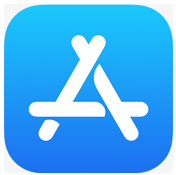

# AppStore Game Analysis

## Data Science Project

## Group Members

1. Apurva Sarode
2. Asif Khan
3. Deepal Rathod
4. Krunal Kothari
5. Rohan Desai

## Contents

1. Introduction
2. Data Cleaning
3. Exploratory Data Analysis
4. Statistics and Machine Learning model
5. Summary

----------------------------------------------------------------------------------------------------------------

# Introduction

We have chosen this topic as games industry is worth billions of dollars, with companies spending vast amounts of money on the development of these games. The data set has been taken from kaggle. We are using this dataset to focus as per developer's point of view. Using this data set we can find which genre is most popularly used i.e strategy simulation, strategy role playing, entertainment, puzzle. Also, which age group is most dominant. Analysis on topics related to free and paid games i.e Will user ratings affect the free and paid types of games. 
First step in this project is to analyze the data set and understand what columns our datset has and which columns are most required and clean the data set with unwanted columns.

## Audience

• Gaming Industry

• Game Developers for App store

## Goals

We will be providing the best possible apps with respect to their size, price, user rating.

## Scope

The scope of the project is the to answer our questions which defines the reason why we have done this project

Questions are:
1.	Which genre is most popularly been developed and which age group is most dominant?
2.	Over the time evolution of games as per release year with respect to price and size?
3.	What type of games should the developer create?
        a.	Free
        b.	Paid
4.	Do user ratings affect the type of game (free or paid)?

----------------------------------------------------------------------------------------------------------------

# Displaying the Dataset

## Importing required Python libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)

from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import urllib.request
from PIL import Image

Once all the required libraries are imported, we then upload the dataset by reading Data from CSV file.

## Loading Dataset

In [2]:
df = pd.read_csv('C:\\Apurva IMP\\appstore_games.csv', parse_dates=['Original_Release_Date', 'Current_Version_Release_Date'])
df.head()

,URL,ID,Name,Subtitle,Icon_URL,Average_User_Rating,User_Rating_Count,Price,In_app_Purchases,Description,...,Languages,Size,Primary_Genre,Genres,Original_Release_Date,Current_Version_Release_Date,value_metadata,NRC_value,State_Code,State
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,5A164FS,INC1,8,GA
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,5B164FT,INC2,9,TX
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,5B164FU,INC4,10,IL
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,5A164FS,INC2,9,TX
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,5B164FT,INCd,4,FL


Using shape method we can view number of rows and columns our data has.

In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in dataset")

There are 17007 rows and 22 columns in dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 22 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon_URL                        17007 non-null object
Average_User_Rating             7561 non-null float64
User_Rating_Count               7561 non-null float64
Price                           16983 non-null float64
In_app_Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age_Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary_Genre                   17007 non-null object
Genres                          17007 non-null object
Original_Release_Date       

----------------------------------------------------------------------------------------------------------------

# Data Cleaning using Python

## What is data cleaning

1) Data cleaning is the process of detecting and correcting or removing corrupt or inaccurate records from a record set which can be a table or database.

2) It refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty data. 

3) After cleansing, a data set should be consistent with other similar data sets in the system. 

4) The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities.

## Why is Data Cleaning Important?

Data cleaning step determines how easy your modelling is going to be. The better your data is, the less complex your learning algorithms need to be. Better structured data that provides the right input values will also determine the accuracy of your predictions. Data cleaning impacts efficiency of rest of your data modeling and decision-making process. This step is critical algorithm building step. 

Efficiency gains of data cleaning results from:

1) Lesser processing time

2) More accurate predictions

3) Simpler algorithms needed

4) Better learning ability of the model

## Data Cleaning

### We filter data based on those colums which are required for our analysis.

In [5]:
df=df.drop(['value_metadata','Subtitle','NRC_value','State_Code','State'],axis=1)
df.head()

,URL,ID,Name,Icon_URL,Average_User_Rating,User_Rating_Count,Price,In_app_Purchases,Description,Developer,Age_Rating,Languages,Size,Primary_Genre,Genres,Original_Release_Date,Current_Version_Release_Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22


### We now check for null values in Each Columns.

In [6]:
null_columns=df.columns[df.isnull().any()]  
df[null_columns].isnull().sum()

Average_User_Rating    9446
User_Rating_Count      9446
Price                    24
In_app_Purchases       9324
Languages                60
Size                      1
dtype: int64

### Since Average user rating has Null values and it will be used for analysis, we overcome this by considering mean of the column for null values.

In [7]:
df['Average_User_Rating']=df['Average_User_Rating'].fillna(df['Average_User_Rating'].mean())

In [8]:
df.describe()

,ID,Average_User_Rating,User_Rating_Count,Price,Size
count,1.700700e+04,17007.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.501011,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,4.060905,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.060905,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.060905,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


Here we can see mean, min, max values for Average User Rating and User Rating Count, Price, Size.

### ID column has null values, hence we delete those records. Since ID is null, we are using dropna function to delete them.

In [9]:
df = df.dropna(axis=0, subset=['ID'])

### Unique values in data frame are displayed below.

In [10]:
print(df.apply(lambda x: len(x.unique())))

URL                             16847
ID                              16847
Name                            16847
Icon_URL                        16847
Average_User_Rating                10
User_Rating_Count                1793
Price                              25
In_app_Purchases                 3804
Description                     16473
Developer                        8693
Age_Rating                          4
Languages                         991
Size                            15795
Primary_Genre                      21
Genres                           1004
Original_Release_Date            3084
Current_Version_Release_Date     2512
dtype: int64


### Extracting the apps having at least 200 reviews and selecting our primary genre as games.

In [11]:
df = df.loc[(df['User_Rating_Count'] > 200) & (df['Primary_Genre']=='Games')]
df.head()

,URL,ID,Name,Icon_URL,Average_User_Rating,User_Rating_Count,Price,In_app_Purchases,Description,Developer,Age_Rating,Languages,Size,Primary_Genre,Genres,Original_Release_Date,Current_Version_Release_Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30
11,https://apps.apple.com/us/app/lumen-lite/id288...,288096268,Lumen Lite,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,5072.0,0.00,NaN,"""The objective of Lumen is to light up all the...",Bridger Maxwell,4+,EN,7086403.0,Games,"Games, Puzzle, Strategy",2008-08-18,2008-11-22


----------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## In Below code we check how Average User rating is Distributed

count    2180.000000
mean        4.261009
std         0.532119
min         1.500000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average_User_Rating, dtype: float64


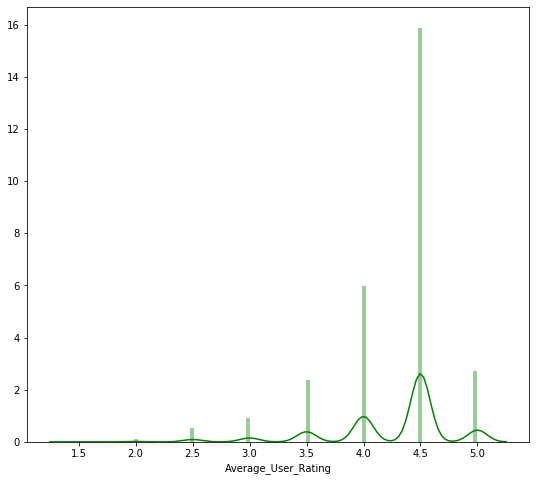

In [12]:
print(df['Average_User_Rating'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Average_User_Rating'], color='green', bins=100, hist_kws={'alpha': 0.4});

## Using Pie chart we display different Genres

In [13]:
# A Function To Plot Pie Plot using Plotly

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df['Genres'].value_counts().sort_values(ascending=False).head(10), ['cyan'], 'Genres')])

From Pie chart we could analyze that Games are mostly based on strategy, simulation and action genres in App Store.

## Evolution of Games Over the Time

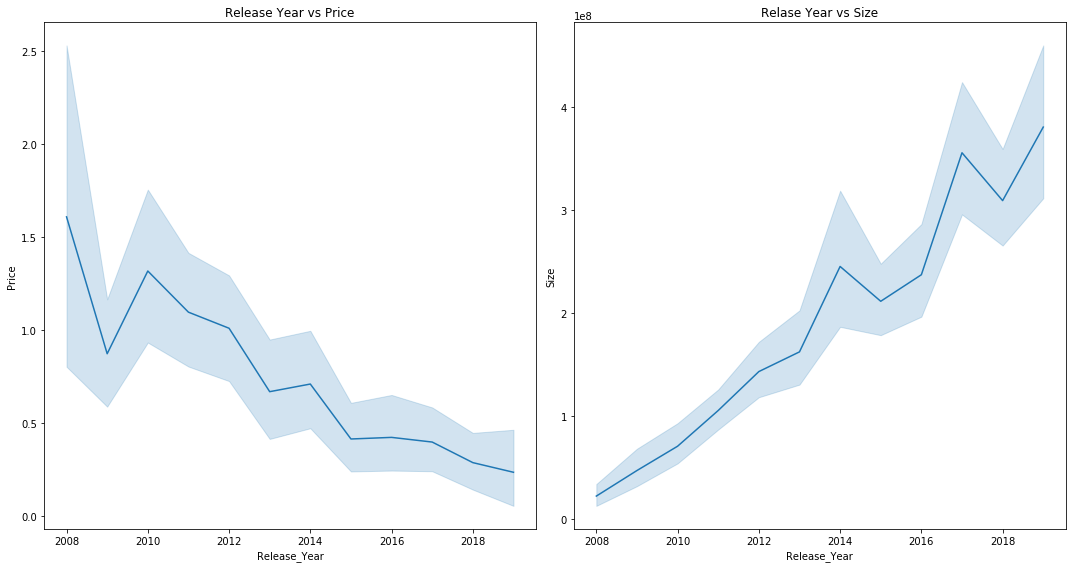

In [14]:
df['Release_Year'] = df['Original_Release_Date'].dt.year

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.lineplot(x='Release_Year', y='Price', data=df, palette='Wistia', ax=ax[0])
ax[0].set_title('Release Year vs Price')

sns.lineplot(x='Release_Year', y='Size', data=df, palette='Wistia', ax=ax[1])
ax[1].set_title('Relase Year vs Size')
plt.tight_layout()
plt.show()

We Can Observe that prices for the games decreased tremendously but Size of the game increased which is obvious as most of us have access internet and we can easily download a 1-2GB game.

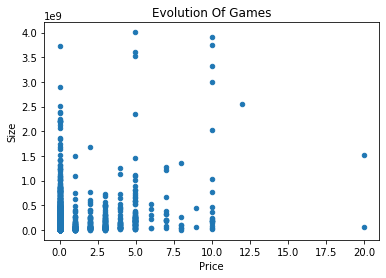

In [15]:
df.plot(kind='scatter',x='Price',y='Size',title='Evolution Of Games')

## Are Paid Games Really Good ?

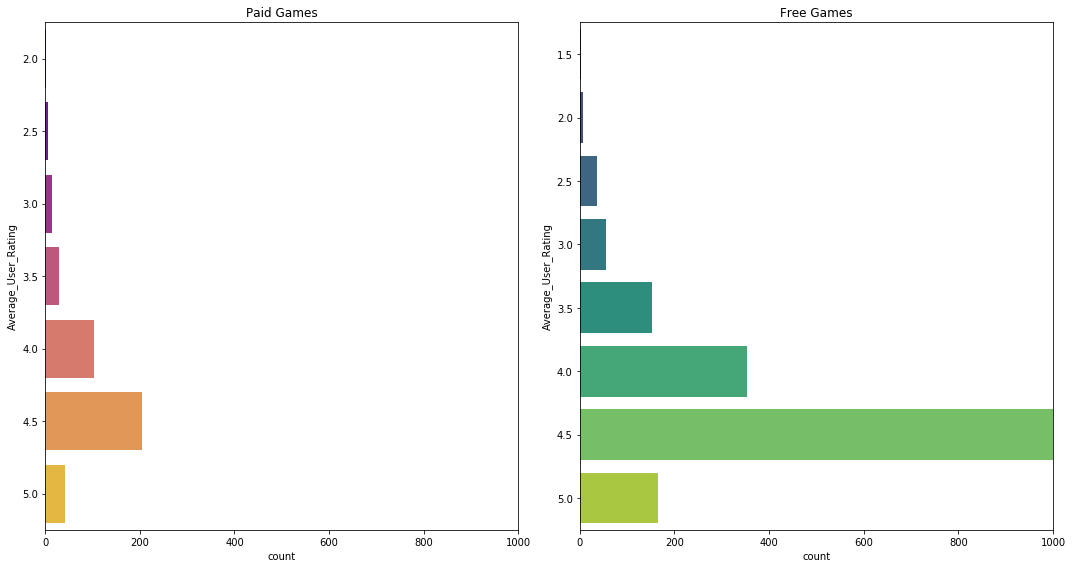

In [16]:
paid = df[df['Price']>0]
free = df[df['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average_User_Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average_User_Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,1000])
plt.tight_layout();
plt.show()

1. As expected there are less number of paid games than free games
2. Most of the Games are rated quite good around 4.0-5.0. But, we can see that the number of ratings is high in free games which shows that more number of downloads.

## Age Ratings?

In [17]:
py.iplot([pie_plot(df['Age_Rating'].value_counts(), ['green', 'orange', 'red'], 'Age_Rating')])

1. Most of the Games are 4+ and 9+
2. So Definetly Game Developers are looking for a wide range of audience

## Most Expensive Game ?

In [18]:
price = df.sort_values(by='Price', ascending=False)[['Name', 'Price', 'Average_User_Rating', 'Size', 'Icon_URL']].head(10)
price.iloc[:, 0:-1]

,Name,Price,Average_User_Rating,Size
276,SmartGo Kifu,19.99,4.5,6.420787e+07
2863,Panzer Corps,19.99,4.5,1.526937e+09
12362,Tropico,11.99,4.5,2.547535e+09
8111,SteamWorld Heist,9.99,4.5,2.426573e+08
4868,Six Ages: Ride Like the Wind,9.99,5.0,7.663135e+08
1129,Avernum: Escape From the Pit HD,9.99,5.0,1.744650e+08
2147,"""Baldur's Gate II: EE""",9.99,4.0,3.747743e+09
4473,Banner Saga,9.99,4.5,2.030561e+09
3415,FTL: Faster Than Light,9.99,4.5,1.798164e+08
4425,Icewind Dale,9.99,4.0,2.996021e+09


SmartGo Kifu and Panzer Corps are the most expensive games on App Store

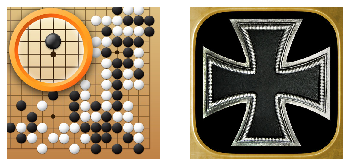

In [19]:
plt.figure(figsize=(6,3))

plt.subplot(121)
image = Image.open(urllib.request.urlopen(price.iloc[0,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(price.iloc[1,-1]))
plt.imshow(image)
plt.axis('off')

plt.show()

## Most Reviewed/Popular Game?

In [20]:
review = df.sort_values(by='User_Rating_Count', ascending=False)[['Name', 'Price', 'Average_User_Rating', 'Size', 'User_Rating_Count', 'Icon_URL']].head(10)
review.iloc[:, 0:-1]

,Name,Price,Average_User_Rating,Size,User_Rating_Count
1378,Clash of Clans,0.0,4.5,1.612196e+08,3032734.0
7187,Clash Royale,0.0,4.5,1.451080e+08,1277095.0
13414,PUBG MOBILE,0.0,4.5,2.384082e+09,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,1.207634e+08,469562.0
8139,Pok\xe9mon GO,0.0,3.5,2.815212e+08,439776.0
2410,Boom Beach,0.0,4.5,2.027858e+08,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,2.459576e+08,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,4.439747e+08,283035.0
38,TapDefense,0.0,3.5,7.774384e+06,273687.0
3550,Star Wars\u2122: Commander,0.0,4.5,1.230838e+08,259030.0


1. Clash Of Clans
2. Clash Royale
3. PUBG Mobile

Are the Most Reviewed Games and We can also say Popular Games on App Store

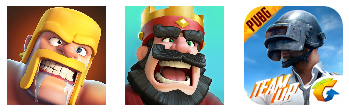

In [21]:
plt.figure(figsize=(6,3))
plt.subplot(131)
image = Image.open(urllib.request.urlopen(review.iloc[0,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(review.iloc[1,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open(urllib.request.urlopen(review.iloc[2,-1]))
plt.imshow(image)
plt.axis('off')

plt.show()

## Best Overall Game ?

In [22]:
best = df.sort_values(by=['Average_User_Rating', 'User_Rating_Count'], ascending=False)[['Name', 'Average_User_Rating', 'User_Rating_Count', 'Size', 'Price', 'Icon_URL']].head(10)
best.iloc[:, 0:-1]

,Name,Average_User_Rating,User_Rating_Count,Size,Price
12473,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,245957632.0,0.00
6089,"Egg, Inc.",5.0,174591.0,74891264.0,0.00
14155,AFK Arena,5.0,156766.0,225711104.0,0.00
8388,South Park: Phone Destroyer\u2122,5.0,156044.0,130186240.0,0.00
13261,From Zero to Hero: Cityman,5.0,146729.0,296638464.0,0.00
15266,Sushi Bar Idle,5.0,123606.0,257325056.0,0.00
10418,Fire Emblem Heroes,5.0,120283.0,175634432.0,0.00
1649,Bloons TD 5,5.0,97776.0,133326848.0,2.99
872,Naval Warfare,5.0,90214.0,43198464.0,0.00
16434,Idle Roller Coaster,5.0,88855.0,234342400.0,0.00


1. Cash, Inc. Fame & Fortune Game turns out to be best overall game with 5.0 rating and 374772 reviews
2. There are also a lot of other Games with 5.0 rating and healthy number of reviews

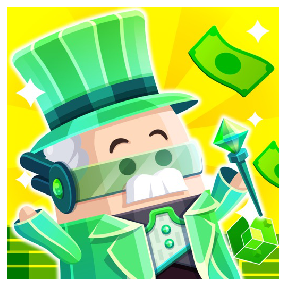

In [23]:
plt.figure(figsize=(5,5))
image = Image.open(urllib.request.urlopen(best.iloc[0, -1]))
plt.axis('off')
plt.imshow(image)
plt.show()

## EDA Summary

After answering above questions, the developers and the gaming industry will be aware of 
1.	What type of the games are popular in which age group? 
2.	How user rating affects the ratio between free and paid games?

----------------------------------------------------------------------------------------------------------------

# Statistics and ML model

## Correlation

Correlation is usually defined as a measure of the linear relationship between two quantitative variables (e.g. height and weight). Correlation means that there is some type of relationship between two variables. 

Types of correlation:

1) Positive Correlation: When the values of one variable increase as the values of the other increase, this is known as positive correlation.

2) Negative Correlation: When the values of one variable decrease as the values of another increase to form an inverse relationship, this is known as negative correlation.

### Correlation using Table

In [24]:
df.corr(method ='pearson')

,ID,Average_User_Rating,User_Rating_Count,Price,Size,Release_Year
ID,1.000000,0.414507,-0.020232,-0.186162,0.245536,0.970771
Average_User_Rating,0.414507,1.000000,0.034753,0.046651,0.108746,0.459839
User_Rating_Count,-0.020232,0.034753,1.000000,-0.035125,0.026719,-0.018609
Price,-0.186162,0.046651,-0.035125,1.000000,0.228093,-0.174719
Size,0.245536,0.108746,0.026719,0.228093,1.000000,0.272140
Release_Year,0.970771,0.459839,-0.018609,-0.174719,0.272140,1.000000


### Pearson Correlation of float-type features

In [25]:
data = [
    go.Heatmap(
        z = df.corr().values,
        x = df.corr().columns.values,
        y = df.corr().columns.values,
        colorscale='YlGnBu',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Pearson Correlation of float-type features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 400, height = 400,
    margin = dict(
        l = 100
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Correlation using Scatterplot graph

A scatterplot is used to represent a correlation between two variables. Below Example shows relation between "Average_user_rating vs Price".

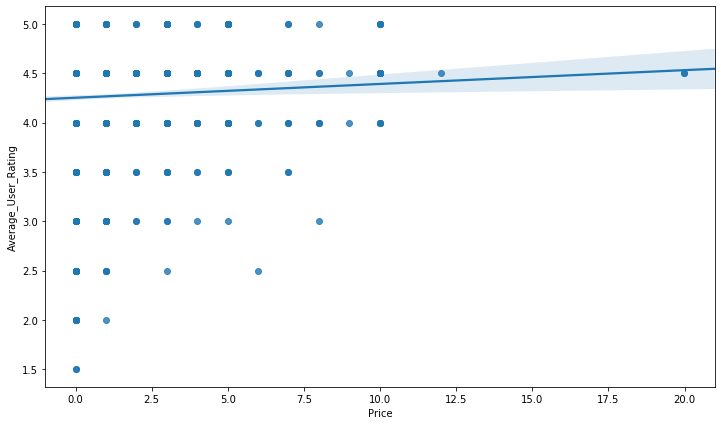

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=df, x='Price', y='Average_User_Rating', ax=ax)
plt.show()

### Correlation using Heatmap graph

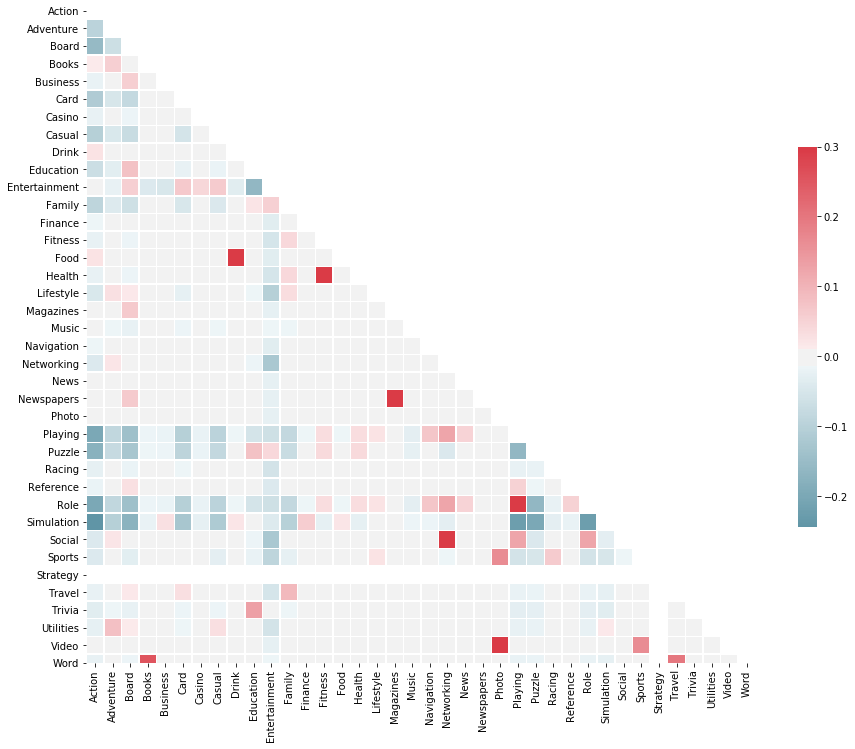

In [27]:
df['GenreList'] = df['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
df['GenreList'].head()

test = df['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Mean and Standard Deviation

    •	The mean is a measure of central tendency.
    •	The standard deviation is a measure of dispersion.
    •	Both are appropriate descriptive statistics for normally distributed data sets using ratio or interval scaling.

We define an relationship between price and rating in below table based on Mean and Standard Deviation.

In [28]:
price_list = sorted(df['Price'].dropna().unique())
rating_stat = pd.DataFrame(columns=['mean', 'std', 'count'], index=price_list)
for price in price_list:
    tmp = df[df['Price']==price]['Average_User_Rating'].dropna()
    rating_stat['mean'][price] = tmp.mean()
    rating_stat['std'][price] = tmp.std()
    rating_stat['count'][price] = len(tmp)

rating_stat.T.head(len(price_list))

,0.00,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,9.99,11.99,19.99
mean,4.2614,4.05392,4.26923,4.32386,4.35135,4.36,4,4.29167,4.14286,4.25,4.52632,4.5,4.5
std,0.535787,0.648329,0.425436,0.473673,0.405943,0.398985,0.774597,0.498102,0.626783,0.353553,0.352518,NaN,0
count,1777,102,52,88,37,75,6,12,7,2,19,1,2


As we can see in above table that the count and mean is highest at price "0", Gradually we see that count decreases as price increases from below table. Hence we can find that there is correlation between number of users and Price.

## Linear Regression

### Preparing data for Linear Regression

In [29]:
#Loading dataset again from CSV file to avoid missing data, errors or other warnings.

df = pd.read_csv('C:\\Apurva IMP\\appstore_games.csv')

In [30]:
# Label Encoding
for f in df.columns:
    if df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

In [31]:
df['Age_Rating'][df['Age_Rating'] == 2] = 4
df['Age_Rating'][df['Age_Rating'] == 3] = 9
df['Age_Rating'][df['Age_Rating'] == 0] = 12
df['Age_Rating'][df['Age_Rating'] == 1] = 17

#df['Age_Rating'].unique()

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: 

### Filling the missing values with 0

In [32]:
y = df['Average_User_Rating']

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Distribution of the data

C:\Users\Apurva Sarode\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Apurva Sarode\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



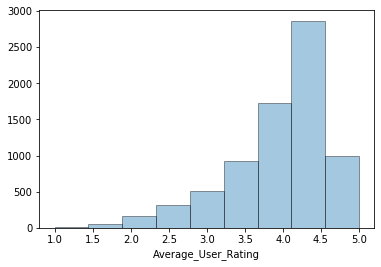

In [33]:
sns.distplot(y, hist=True, kde=False, bins=9, hist_kws={'edgecolor':'#000000'})

### Linear Regression Model

In [34]:
X_train_preprocessed = preprocessing.normalize(X_train)
X_test_preprocessed = preprocessing.normalize(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_preprocessed, y_train)

y_train_predict = lin_model.predict(X_train_preprocessed)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test_preprocessed)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE is 0.7568776266408171


The model performance for testing set
--------------------------------------
RMSE is 0.7855278010874518


### Errors between Actual and predicted

In [35]:
error_frame = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_test_predict.flatten()})
error_frame.head(10)

,Actual,Predicted
0,0.0,-0.903910
1,4.5,3.807841
2,0.0,0.315862
3,5.0,4.005441
4,0.0,0.274657
5,5.0,5.018233
6,0.0,0.073782
7,4.5,3.923356
8,0.0,0.211418
9,4.0,3.425894


### Plotting the first 20 comparisons of our error frame

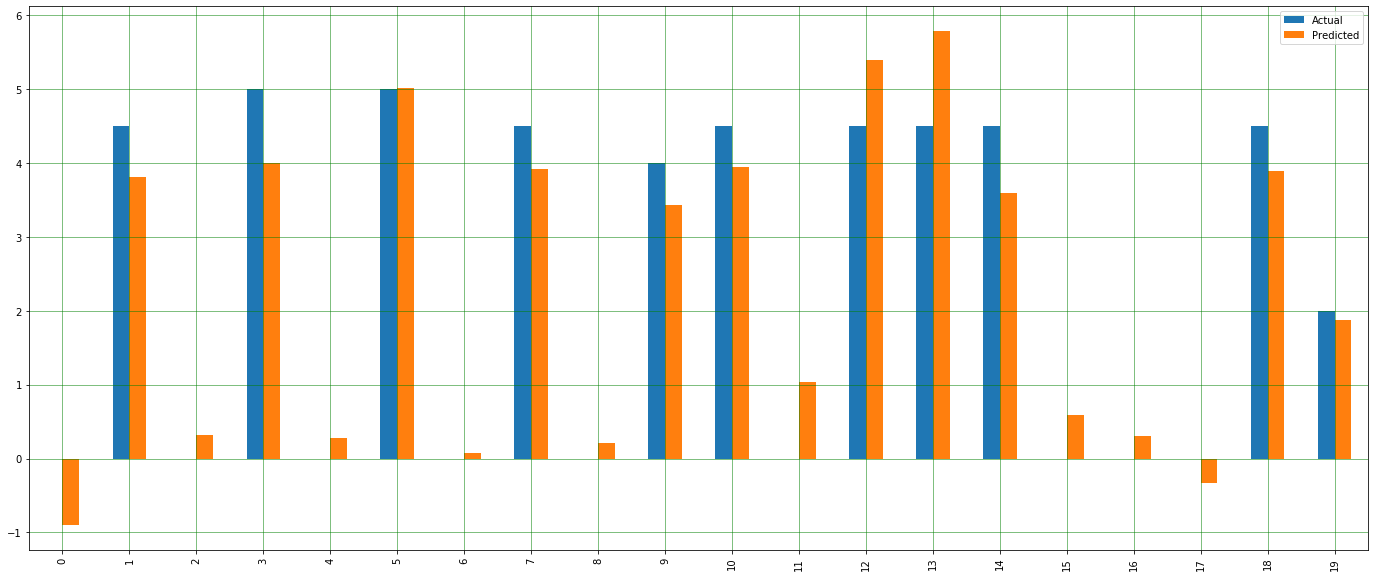

In [36]:
df1 = error_frame[0:20]
df1.plot(kind='bar',figsize=(24,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

A lot of our predictions lie between 4 and 4.5, which is mostly because the dataset majorly had those values.

----------------------------------------------------------------------------------------------------------------

# Summary

•	In this project, we analyzed data regarding the Gaming Application-App store which will benefit the audience i.e. the developer as well as the gaming industry.

•	Different Genre helps us to understand which type of games are particularly used by the user i.e. strategy-based games, simulation-based games, action-based games etc. 

•	Evolution of games will give audience an idea about the types which got popular over the time. Eventually, we observed that the price got reduced whereas the size increased which is obvious as most of us have internet access and can easily download a 1-2GB game.

•	Also, when compared the audience gets an idea that the user usually uses/downloads the free games instead of paid ones.

•	Age ratings is also important as it gives audience an idea which age group of customer uses which types of Gaming Application.

•	Most reviewed/popular game gives the audience an idea which games are highly reviewed by the customer as per the downloads as well as user rating count.

•	It is usally observed that lesser the price more will be the user rating as well as the count.

•	The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values.

•	In a good model, the RMSE should be close for both your testing data and your training data. If the RMSE for your testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training.

----------------------------------------------------------------------------------------------------------------

# Citations

    https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools
    https://www.kaggle.com/hkhoi91/data-viz-what-to-focus-on-as-a-game-dev
    https://www.displayr.com/what-is-correlation/
    https://www.kaggle.com/spidyweb/gaming-industry-visualization
    https://en.wikipedia.org/wiki/Data_cleansing
    https://www.kaggle.com/thedatadude/eda-app-to-ratings
    https://www.dezyre.com/article/data-cleaning-in-python/406
    https://en.wikipedia.org/wiki/Exploratory_data_analysis
    https://www.kaggle.com/margesh/regression-scikit-xgb-h2o-automl

----------------------------------------------------------------------------------------------------------------

# Thank you